In [1]:
library(ISLR2)
names(Hitters)

dim(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

In [2]:
# Check for missing values in the Salary df
sum(is.na(Hitters$Salary))

[1] 59

In [3]:
# Remove all rows with a missing Salary Value

Hitters <- na.omit(Hitters)

# Check the dimension of the new dataset
dim(Hitters)

[1] 263  20

In [4]:
# Check for anymore missing values

sum(is.na(Hitters))

[1] 0

The
function (part of the
library) performs best sub
regsubsets()
leaps
regsubsets()
set selection by identifying the best model that contains a given number
of predictors, where best is quantified using RSS. The syntax is the same
as for lm(). The
command outputs the best set of variables for
summary()
each model size.

In [5]:
# Fit a best subset selection
library(leaps)

regfit_full <- regsubsets(Salary ~ ., data = Hitters)

# Get the summary of the model
summary(regfit_full)

Warning message:
"package 'leaps' was built under R version 3.6.3"

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

An asterisk indicates that a given variable is included in the corresponding
model. For instance, this output indicates that the best two-variable model
contains only Hits and CRBI. By default, regsubsets() only reports results
up to the best eight-variable model. But the `nvmax` option can be used
in order to return as many variables as are desired. Here we fit up to a
19-variable model.

In [6]:
# Fit a best subset selection
library(leaps)

regfit_full <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)

# Get the summary of the model
reg_summary <- summary(regfit_full)


The summary() function also returns R2, RSS, adjusted R2, Cp, and BIC.
We can examine these to try to select the best overall model.

In [7]:
names(reg_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [8]:
# Determine the r2

reg_summary$rsq


[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

Plotting RSS, adjusted R2, Cp, and BIC for all of the models at once will
help us decide which model to select. Note the type = "l" option tells R to
connect the plotted points with lines.

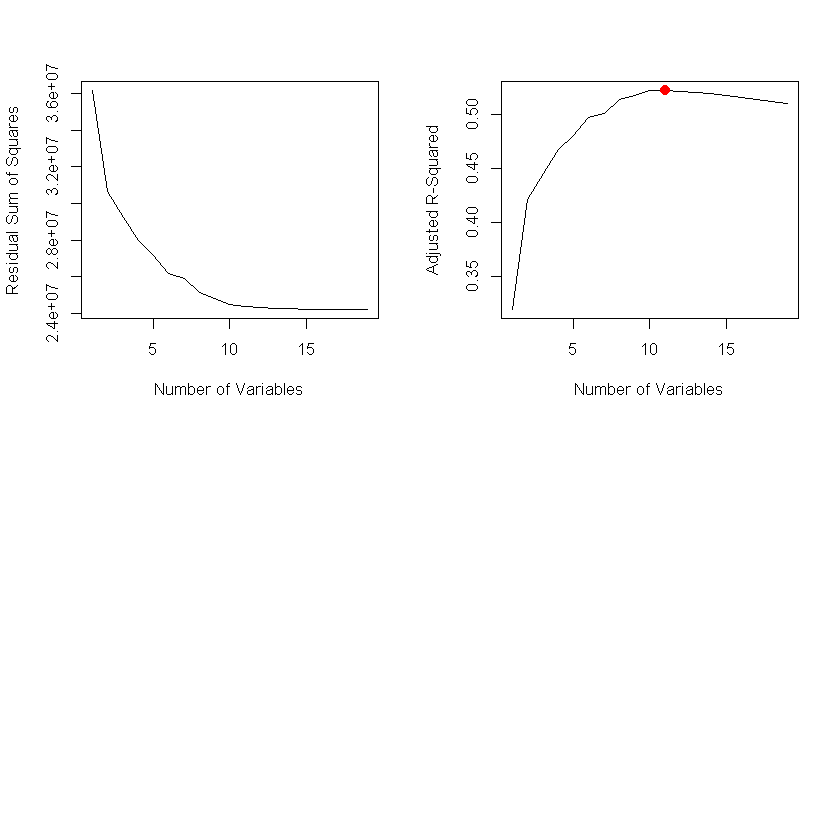

In [9]:
par(mfrow = c(2, 2))

plot(reg_summary$rss, xlab = "Number of Variables", ylab = "Residual Sum of Squares", type = "l")

plot(reg_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R-Squared", type = "l")

points(which.max(reg_summary$adjr2), reg_summary$adjr2[which.max(reg_summary$adjr2)], col = "red", cex = 2, pch = 20)

The points() command works like the plot() command, except that it
points()
puts points on a plot that has already been created, instead of creating a
new plot. The which.max() function can be used to identify the location of
the maximum point of a vector. We will now plot a red dot to indicate the
model with the largest adjusted R2 statistic.

In [10]:
which.max(reg_summary$adjr2)

[1] 11

In a similar fashion we can plot the Cp and BIC statistics, and indicate the
models with the smallest statistic using which.min().

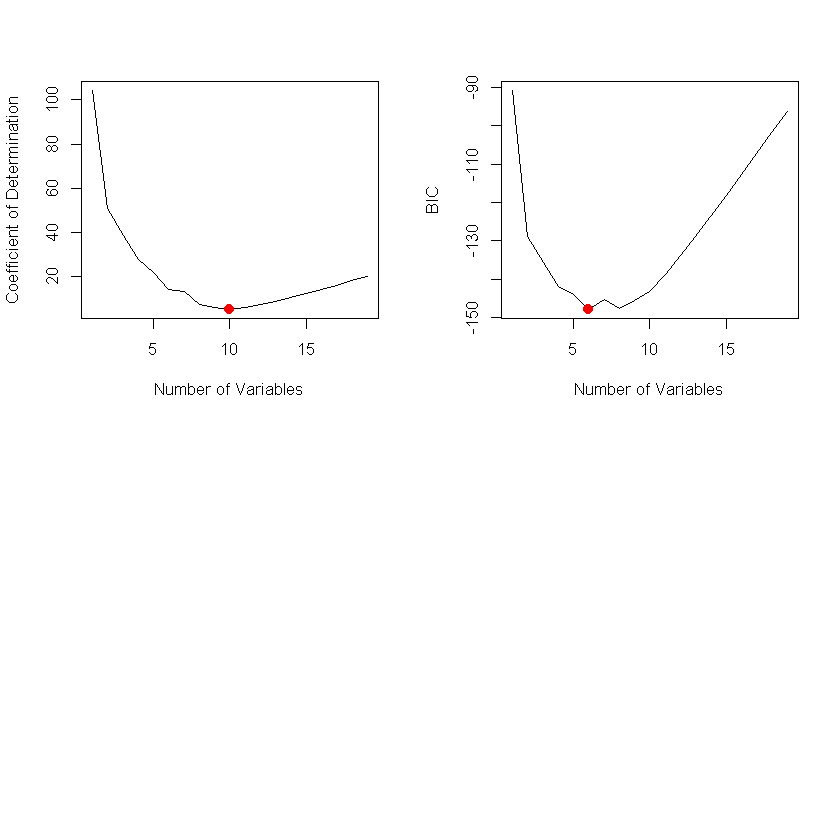

In [11]:
par(mfrow = c(2, 2))

# Cp Plot to determine best model
plot(x = reg_summary$cp, xlab = "Number of Variables", ylab = "Coefficient of Determination", type = "l")

points(which.min(reg_summary$cp), reg_summary$cp[which.min(reg_summary$cp)], col = "red", cex = 2, pch = 20)


# Determine the best model using BIC
plot(reg_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")

points(which.min(reg_summary$bic), reg_summary$bic[which.min(reg_summary$bic)], col = "red", cex = 2, pch = 20)

The regsubsets() function has a built-in plot() command which can
be used to display the selected variables for the best model with a given
number of predictors, ranked according to the BIC, Cp, adjusted R2, or
AIC. To find out more about this function, type ?plot.regsubsets.

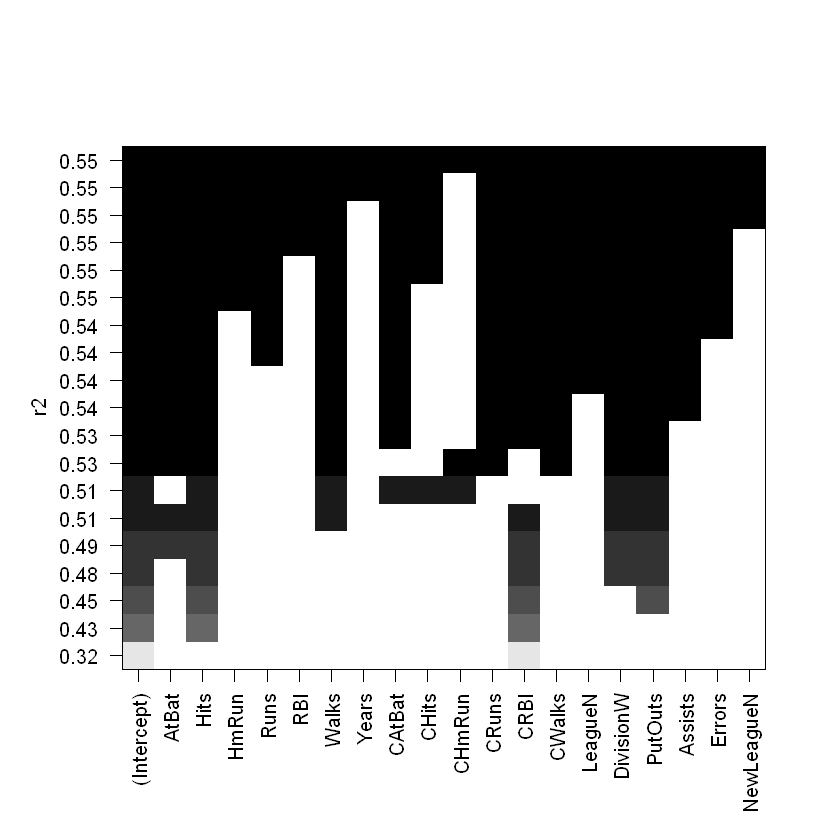

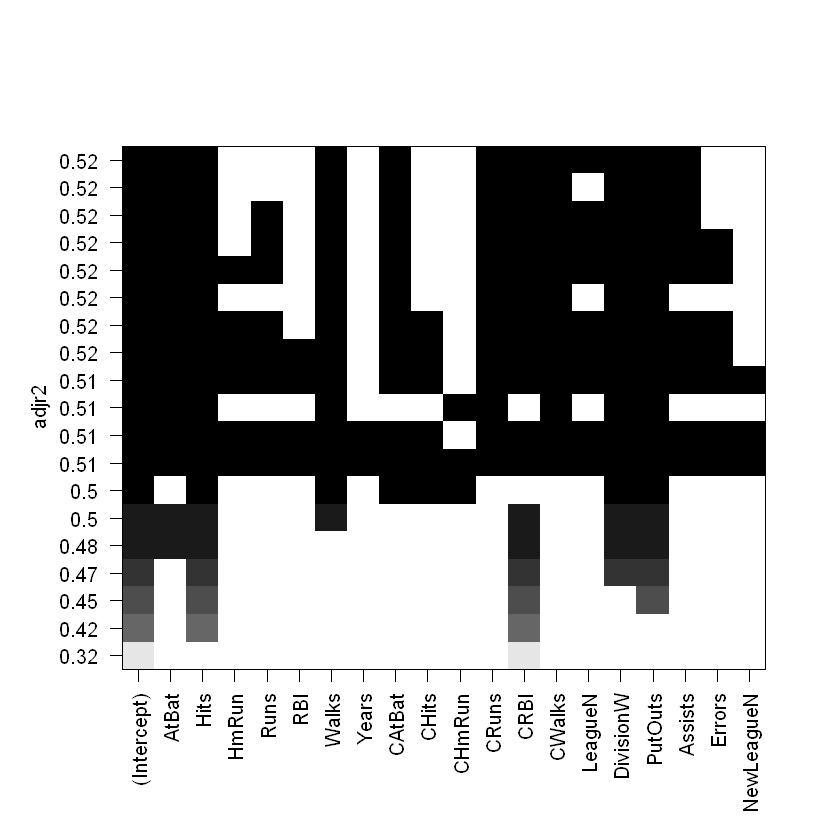

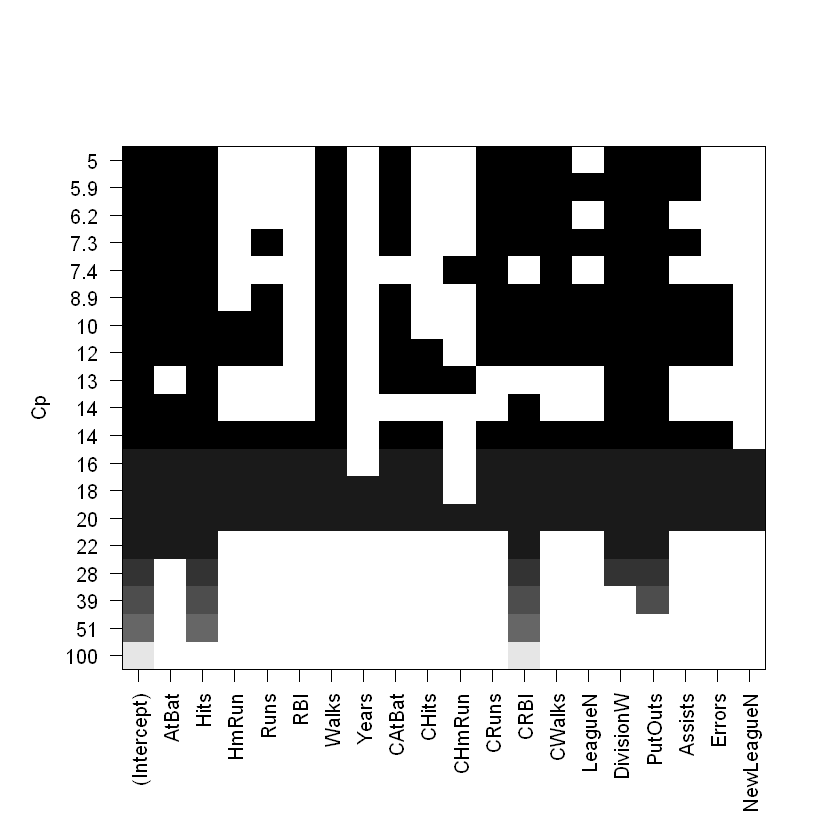

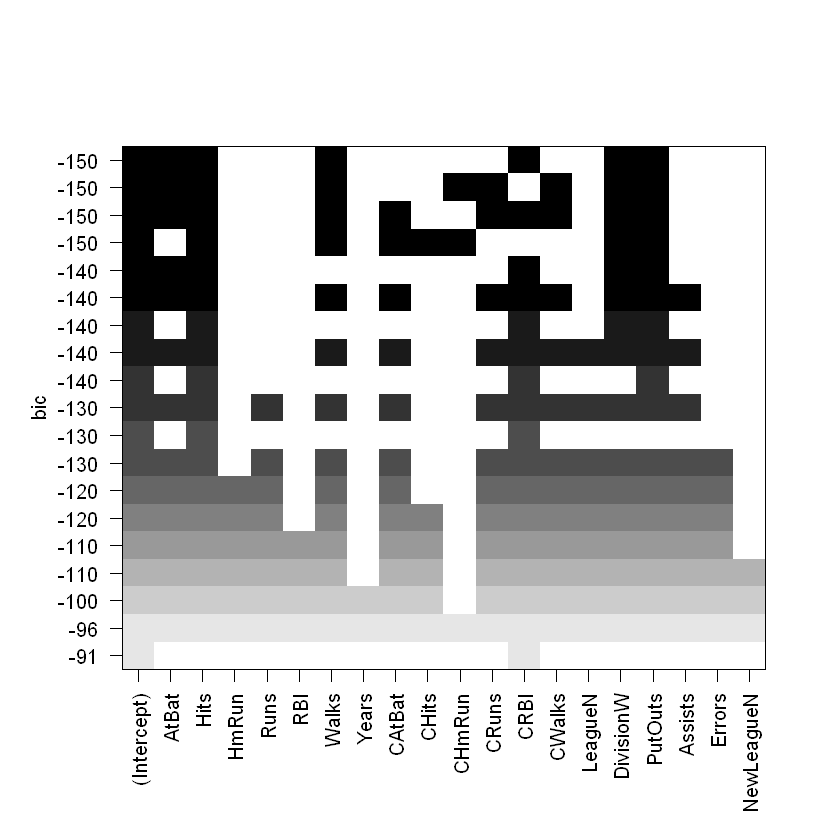

In [12]:
plot(regfit_full, scale = "r2")
plot(regfit_full, scale = "adjr2")
plot(regfit_full, scale = "Cp")
plot(regfit_full, scale = "bic")

The top row of each plot contains a black square for each variable selected
according to the optimal model associated with that statistic. For instance,
we see that several models share a BIC close to −150. However, the model
with the lowest BIC is the six-variable model that contains only AtBat,
Hits, Walks, CRBI, DivisionW, and PutOuts. We can use the coef() function
to see the coefficient estimates associated with this model.

In [13]:
coef(regfit_full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Forward and Backward Stepwise Selection
We can also use the `regsubsets()` function to perform forward stepwise
or backward stepwise selection, using the argument method = "forward" or
method = "backward".

In [14]:
regfit_fwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")

summary(regfit_fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [15]:
regfit_bwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")

summary(regfit_bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


For instance, we see that using forward stepwise selection, the best onevariable
model contains only CRBI, and the best two-variable model additionally
includes Hits. For this data, the best one-variable through sixvariable
models are each identical for best subset and forward selection.
However, the best seven-variable models identified by forward stepwise selection,
backward stepwise selection, and best subset selection are different.

In [16]:
coef(regfit_full, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [17]:
coef(regfit_fwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [18]:
coef(regfit_bwd, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Choosing Among Models Using the Validation-Set Approach and Cross-Validation

We will now consider how to do this
using the validation set and cross-validation approaches.
In order for these approaches to yield accurate estimates of the test
error, we must use only the training observations to perform all aspects of
model-fitting—including variable selection. Therefore, the determination of
which model of a given size is best must be made using only the training
observations. This point is subtle but important. If the full data set is used
to perform the best subset selection step, the validation set errors and
cross-validation errors that we obtain will not be accurate estimates of the
test error.

In order to use the validation set approach, we begin by splitting the
observations into a training set and a test set. We do this by creating
a random vector, train, of elements equal to TRUE if the corresponding
observation is in the training set, and FALSE otherwise. The vector test has
a TRUE if the observation is in the test set, and a FALSE otherwise. Note the
! in the command to create test causes TRUEs to be switched to FALSEs and
vice versa. We also set a random seed so that the user will obtain the same
training set/test set split.

In [19]:
set.seed(1)

train <- sample(c(TRUE, FALSE), nrow(Hitters), replace=TRUE)


test <- (!train)

>Now, we apply regsubsets() to the training set in order to perform best
subset selection.

In [20]:
regfit_best <- regsubsets(Salary ~ ., data = Hitters[train,], nvmax = 19)


Notice that we subset the Hitters data frame directly in the call in order
to access only the training subset of the data, using the expression
Hitters[train, ]. We now compute the validation set error for the best
model of each model size. We first make a model matrix from the test
data.

In [21]:
test_mat <- model.matrix(Salary ~ ., data = Hitters[test, ])

The model.matrix() function is used in many regression packages for building an “X” matrix from data. Now we run a loop, and for each size i, we
extract the coefficients from regfit.best for the best model of that size,
multiply them into the appropriate columns of the test model matrix to
form the predictions, and compute the test MSE.

In [22]:
val_errors <- rep(NA, 19)

for (i in 1:19) {
    coef_i <- coef(regfit_best, id = i)
    pred <- test_mat[ , names(coef_i)] %*% coef_i
    val_errors[i] <- mean((Hitters$Salary[test] - pred)^2)
}

In [23]:
val_errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

>   We find that the best model is the one that contains seven variables

In [24]:
which.min(val_errors)

[1] 7

In [25]:
coef(regfit_best, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

This was a little tedious, partly because there is no predict() method
for regsubsets(). Since we will be using this function again, we can capture
our steps above and write our own predict method.

In [26]:
predict_regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coef_i <- coef(object, id = id)
    xvars <- names(coef_i)
    mat[, xvars] %*% coef_i
}


Our function pretty much mimics what we did above. The only complex
part is how we extracted the formula used in the call to regsubsets(). We
demonstrate how we use this function below, when we do cross-validation.

Finally, we perform best subset selection on the full data set, and select
the best seven-variable model. It is important that we make use of the
full data set in order to obtain more accurate coefficient estimates. Note
that we perform best subset selection on the full data set and select the
best seven-variable model, rather than simply using the variables that were
obtained from the training set, because the best seven-variable model on
the full data set may differ from the corresponding model on the training
set.

In [27]:
regfit_best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)


coef(regfit_best, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

> In fact, we see that the best seven-variable model on the full data set has a
different set of variables than the best seven-variable model on the training
set.

We now try to choose among the models of different sizes using crossvalidation.
This approach is somewhat involved, as we must perform best
subset selection within each of the k training sets. Despite this, we see that
with its clever subsetting syntax, R makes this job quite easy. First, we
create a vector that allocates each observation to one of k = 10 folds, and
we create a matrix in which we will store the results.

In [28]:
k <- 10

n <- nrow(Hitters)

set.seed(1)


folds <- sample(rep(1:k, length = n))

cv_errors <- matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))


Now we write a for loop that performs cross-validation. In the jth fold, the
elements of folds that equal j are in the test set, and the remainder are in
the training set.We make our predictions for each model size (using our new
predict() method), compute the test errors on the appropriate subset, and
store them in the appropriate slot in the matrix cv.errors. Note that in the
following code R will automatically use our predict.regsubsets() function
when we call predict() because the best.fit object has class regsubsets.

In [29]:
for (j in 1:k) {
    best_fit <- regsubsets(Salary ~ ., data = Hitters[folds != j, ], nvmax = 19)

    for (i in 1:19) {
        pred <- predict_regsubsets(best_fit, Hitters[folds == j, ], id = i)
        cv_errors[j, i] <- mean((Hitters$Salary[folds == j] - pred)^2)
    }
}

This has given us a 10×19 matrix, of which the (j, i)th element corresponds
to the test MSE for the jth cross-validation fold for the best i-variable
model. We use the apply() function to average over the columns of this
matrix in order to obtain a vector for which the ith element is the crossvalidation
error for the i-variable model.

In [30]:
mean_cv_errors <- apply(cv_errors, 2, mean)

mean_cv_errors

1        2        3        4        5        6        7        8 
143439.8 126817.0 134214.2 131782.9 130765.6 120382.9 121443.1 114363.7 
       9       10       11       12       13       14       15       16 
115163.1 109366.0 112738.5 113616.5 115557.6 115853.3 115630.6 116050.0 
      17       18       19 
116117.0 116419.3 116299.1

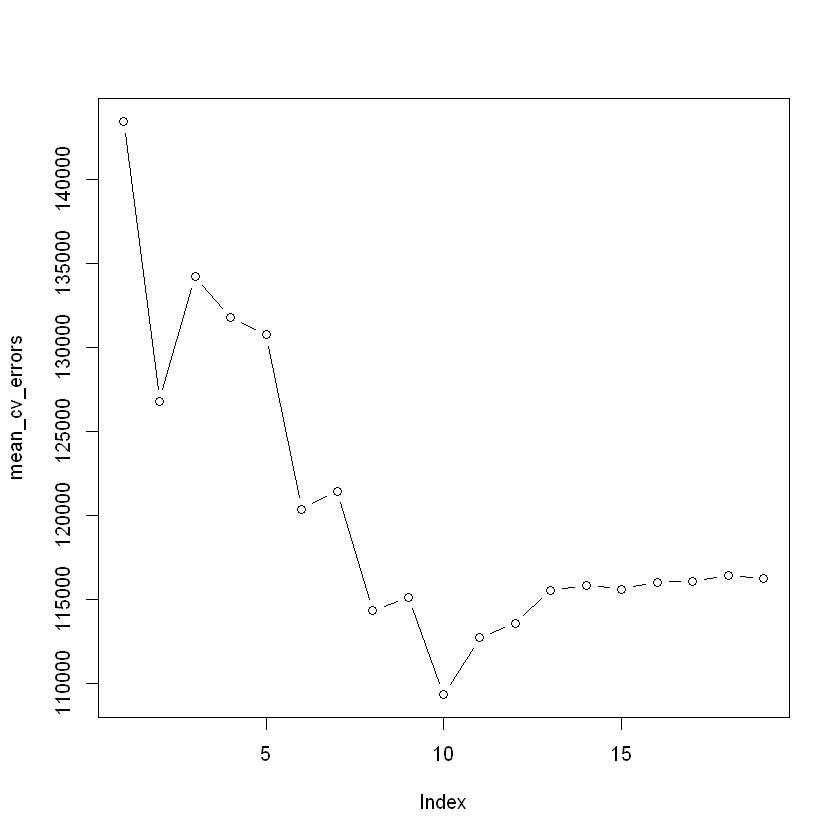

In [31]:
par(mfrow = c(1, 1))

plot(mean_cv_errors, type = "b")

> We see that cross-validation selects a 10-variable model. We now perform
best subset selection on the full data set in order to obtain the 10-variable
model.

In [32]:
reg_best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)

coef(reg_best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

## Ridge Regression and the Lasso

We will use the glmnet package in order to perform ridge regression and
the lasso. The main function in this package is glmnet(), which can be used
to fit ridge regression models, lasso models, and more. This function has
slightly different syntax from other model-fitting functions that we have
encountered thus far in this book. In particular, we must pass in an x
matrix as well as a y vector, and we do not use the y ∼ x syntax. We will
now perform ridge regression and the lasso in order to predict Salary on
the Hitters data.

In [33]:
library(glmnet)

x <- model.matrix(Salary ~ ., data = Hitters)[ , -1]

y <- Hitters$Salary

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1-1


The model.matrix() function is particularly useful for creating x; not only
does it produce a matrix corresponding to the 19 predictors but it also
automatically transforms any qualitative variables into dummy variables. The latter property is important because glmnet() can only take numerical,
quantitative inputs.

## Ridge Regression

The glmnet() function has an alpha argument that determines what type
of model is fit. If alpha=0 then a ridge regression model is fit, and if alpha=1
then a lasso model is fit.

In [34]:
grid <- 10^seq(10, -2, length = 100)

ridge_mod <- glmnet(x, y, alpha = 0, lambda = grid)

By default the glmnet() function performs ridge regression for an automatically
selected range of λ values. However, here we have chosen to implement
the function over a grid of values ranging from λ = 10^10 to λ = 10^−2, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit. As we will see, we can also compute
model fits for a particular value of λ that is not one of the original
grid values. Note that by default, the glmnet() function standardizes the
variables so that they are on the same scale. To turn off this default setting,
use the argument standardize = FALSE.

Associated with each value of λ is a vector of ridge regression coefficients,
stored in a matrix that can be accessed by coef(). In this case, it is a 20×100
matrix, with 20 rows (one for each predictor, plus an intercept) and 100
columns (one for each value of λ).

In [35]:
dim(coef(ridge_mod))

[1]  20 100

We expect the coefficient estimates to be much smaller, in terms of ℓ2 norm,
when a large value of λ is used, as compared to when a small value of λ is
used. These are the coefficients when λ = 11,498, along with their ℓ2 norm:

In [36]:
ridge_mod$lambda[50]

[1] 11497.57

In [37]:
coef(ridge_mod)[, 50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In contrast, here are the coefficients when λ = 705, along with their ℓ2
norm. Note the much larger ℓ2 norm of the coefficients associated with this
smaller value of λ.

In [38]:
ridge_mod$lambda[60]

[1] 705.4802

In [39]:
coef(ridge_mod)[, 60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [40]:
sqrt(sum(coef(ridge_mod)[-1, 60]^2))

[1] 57.11001

We can use the predict() function for a number of purposes. For instance,
we can obtain the ridge regression coefficients for a new value of λ, say 50:

In [41]:
predict(ridge_mod, s = 50, type = "coefficients")[1:20, ]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression and the lasso. There are two
common ways to randomly split a data set. The first is to produce a random
vector of TRUE, FALSE elements and select the observations corresponding to
TRUE for the training data. The second is to randomly choose a subset of
numbers between 1 and n; these can then be used as the indices for the
training observations. The two approaches work equally well. We used the
former method in Section 6.5.1. Here we demonstrate the latter approach.
We first set a random seed so that the results obtained will be reproducible.

In [43]:
set.seed(1)

train <- sample(1:nrow(x), nrow(x) / 2)

test <- (-train)

y_test <- y[test]

Next we fit a ridge regression model on the training set, and evaluate
its MSE on the test set, using λ = 4. Note the use of the predict()
function again. This time we get predictions for a test set, by replacing
type="coefficients" with the newx argument.

In [47]:
ridge_mod <- glmnet(x[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-12)

ridge_pred <- predict(ridge_mod, s = 4, newx = x[test,])

mean((ridge_pred - y_test)^2)

[1] 142199.2

The test MSE is 142,199. Note that if we had instead simply fit a model
with just an intercept, we would have predicted each test observation using
the mean of the training observations. In that case, we could compute the
test set MSE like this:

In [48]:
mean((mean(y[train]) - y[test])^2)

[1] 224669.9

We could also get the same result by fitting a ridge regression model with
a very large value of λ. Note that 1e10 means 10^10.

In [49]:
ridge_pred <- predict(ridge_mod, s = 1e10, newx = x[test,])

mean((ridge_pred - y_test)^2)

[1] 224669.8

So fitting a ridge regression model with λ = 4 leads to a much lower test
MSE than fitting a model with just an intercept. We now check whether
there is any benefit to performing ridge regression with λ = 4 instead of
just performing least squares regression. Recall that least squares is simply
ridge regression with λ = 0.8

In [53]:
ridge_pred <- predict(ridge_mod, s = 0, newx = x[test,], exact = T, x = x[train,], y = y[train])

mean((ridge_pred - y_test)^2)

lm(y ~ x, subset = train)

predict(ridge_mod, s = 0, exact = T, type = "coefficients", x = x[train,], y = y[train])[1:20, ]

[1] 168588.6


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.0200994   -0.3521900   -1.6371383    5.8146692    1.5423361    1.1241837 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7288406  -16.3795195   -0.6411235    3.1629444    3.4005281   -0.9739405 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.6003976    0.3378422  119.1434637 -144.0853061    0.1976300    0.6804200 
      Errors   NewLeagueN 
  -4.7127879  -71.0898914

In general, if we want to fit a (unpenalized) least squares model, then
we should use the `lm()` function, since that function provides more useful
outputs, such as standard errors and p-values for the coefficients.


In general, instead of arbitrarily choosing `λ = 4`, it would be better to
use cross-validation to choose the tuning parameter `λ`. We can do this using
the built-in cross-validation function, `cv.glmnet()`. By default, the function
performs ten-fold cross-validation, though this can be changed using the
argument `nfolds`. Note that we set a random seed first so our results will
be reproducible, since the choice of the cross-validation folds is random.

[1] 326.0828

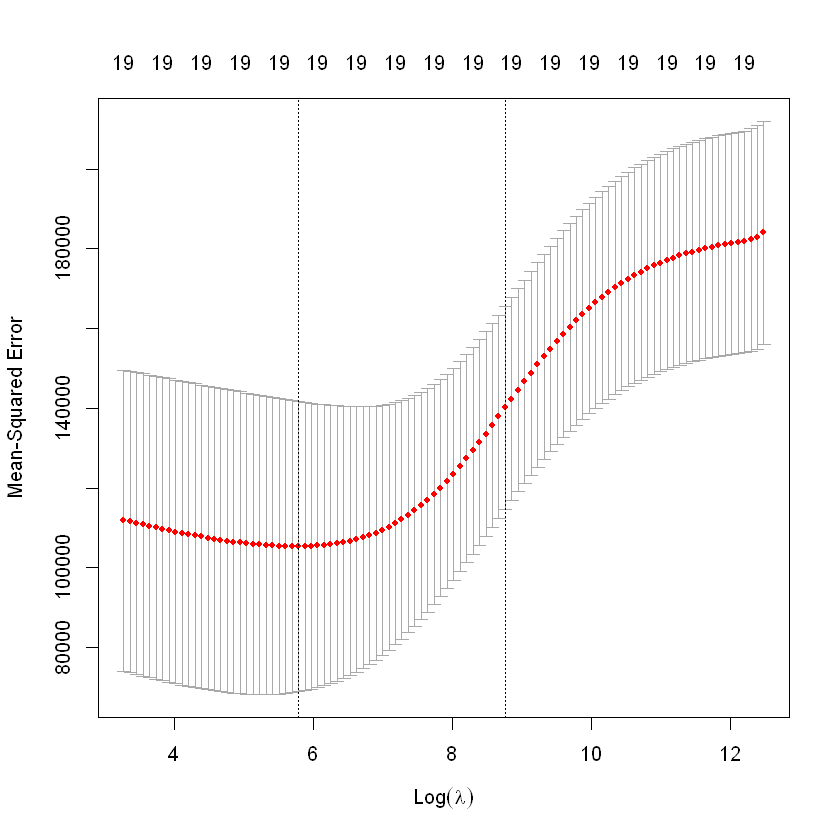

In [57]:
set.seed(1)

cv_out <- cv.glmnet(x[train, ], y[train], alpha = 0)

plot(cv_out)

best_lam <- cv_out$lambda.min

best_lam

Therefore, we see that the value of λ that results in the smallest crossvalidation
error is 326. What is the test MSE associated with this value of
λ?

In [58]:
ridge_pred <- predict(ridge_mod, s = best_lam, newx = x[test,])

mean((ridge_pred - y_test)^2)

[1] 139856.6

This represents a further improvement over the test MSE that we got using
`λ = 4`. Finally, we refit our ridge regression model on the full data set,
using the value of `λ` chosen by cross-validation, and examine the coefficient
estimates.

In [59]:
out <- glmnet(x, y, alpha = 0, lambda = grid, nfolds = 10)


predict(out, type = "coefficients", s = best_lam)[1:20, ]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.46209975   0.07640574   0.86308801   0.59870362   1.06416544   0.87873337 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62579483   1.35341840   0.01131653   0.05732472   0.40542580   0.11455464 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12166650   0.05295541  22.17770610 -79.18681200   0.16648537   0.02959948 
      Errors   NewLeagueN 
 -1.37068562   9.06869822

# The Lasso

We saw that ridge regression with a wise choice of `λ` can outperform least
squares as well as the null model on the Hitters data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we once again
use the `glmnet()` function; however, this time we use the argument `alpha=1`.
Other than that change, we proceed just as we did in fitting a ridge model.

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

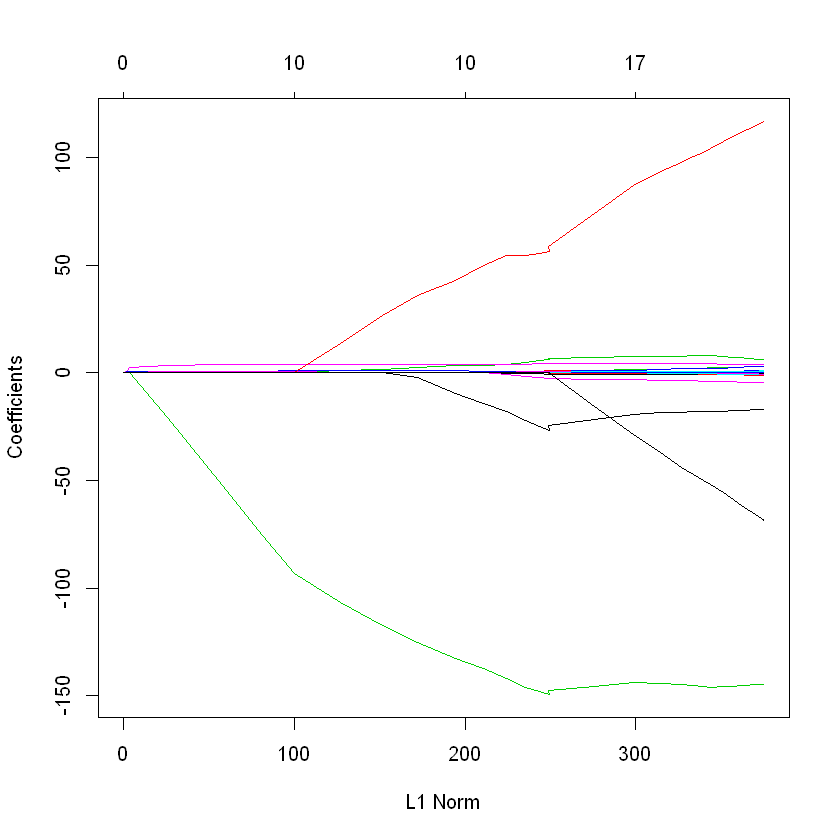

In [60]:
lasso_mod <- glmnet(x[train,], y[train], alpha = 1, lambda = grid)

plot(lasso_mod)

> We can see from the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients will be exactly equal to zero. We now
perform cross-validation and compute the associated test error.

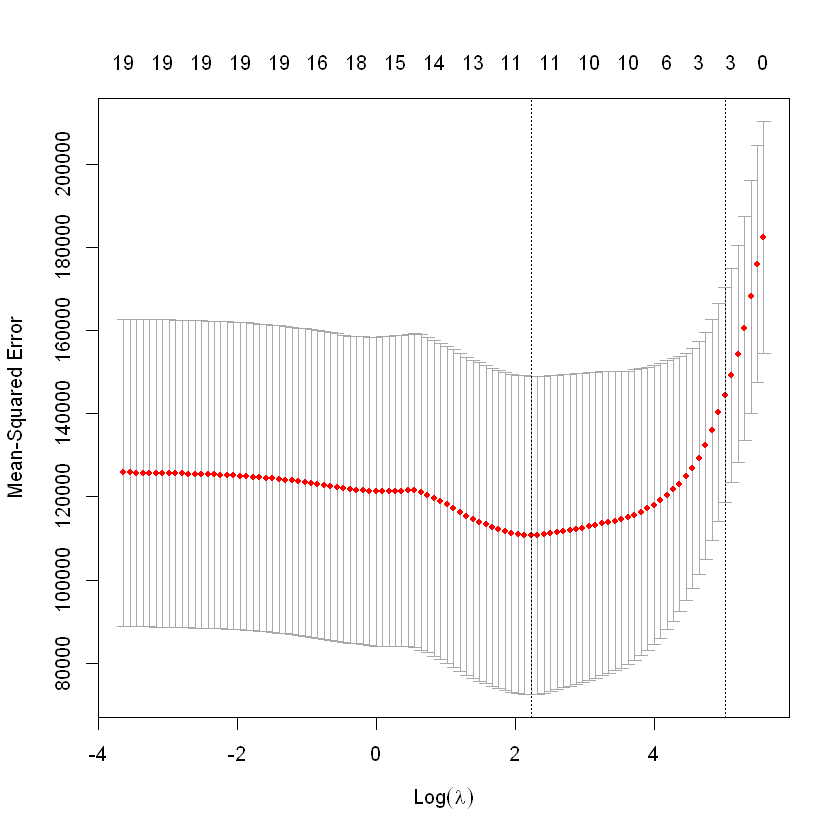

In [61]:
set.seed(1)

cv_out <- cv.glmnet(x[train, ], y[train], alpha = 1)

plot(cv_out)

In [62]:
best_lam <- cv_out$lambda.min

lasso_pred <- predict(lasso_mod, s = best_lam, newx = x[test,])

mean((lasso_pred - y_test)^2)

[1] 143673.6

This is substantially lower than the test set MSE of the null model and of
least squares, and very similar to the test MSE of ridge regression with λ
chosen by cross-validation.
However, the lasso has a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 8 of the 19 coefficient estimates are exactly zero. So the lasso model with λ chosen
by cross-validation contains only eleven variables.

In [63]:
out <- glmnet(x, y, alpha = 1, lambda = grid)

lasso_coef <- predict(out, type = "coefficients", s = best_lam)[1:20, ]

lasso_coef

(Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000

# PCR and PLS Regression Methods

Principal components regression (PCR) can be performed using the `pcr()`
function, which is part of the pls library.We now apply PCR to the Hitters
data, in order to predict Salary. Again, we ensure that the missing values
have been removed from the data,

In [64]:
library(pls)

set.seed(2)

pcr_fit <- pcr(Salary ~ ., data = Hitters, scale = TRUE, validation = "CV")


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



The syntax for the `pcr()` function is similar to that for lm(), with a few
additional options. Setting scale = TRUE has the effect of standardizing each
predictor, prior to generating the principal components, so that
the scale on which each variable is measured will not have an effect. Setting
validation = "CV" causes pcr() to compute the ten-fold cross-validation
error for each possible value of M, the number of principal components
used. The resulting fit can be examined using summary().

In [65]:
summary(pcr_fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    353.2    355.0    352.8    348.4    343.6
adjCV          452    351.6    352.7    354.4    352.1    347.6    342.7
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.5    347.7    349.6     351.4     352.1     353.5     358.2
adjCV    344.7    346.7    348.5     350.1     350.7     352.0     356.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        349.7     349.4     339.9     341.6     339.2     339.6
adjCV     348.0     347.7     338.2     339.7     337.2     337.6

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

The CV score is provided for each possible number of components, ranging
from M = 0 onwards. (We have printed the CV output only up to M = 4.)
Note that pcr() reports the root mean squared error; in order to obtain
the usual MSE, we must square this quantity. For instance, a root mean
squared error of 352.8 corresponds to an MSE of 352.82 = 124,468.
One can also plot the cross-validation scores using the 
validationplot()
function. Using val.type = "MSEP" will cause the cross-validation MSE to
be plotted.

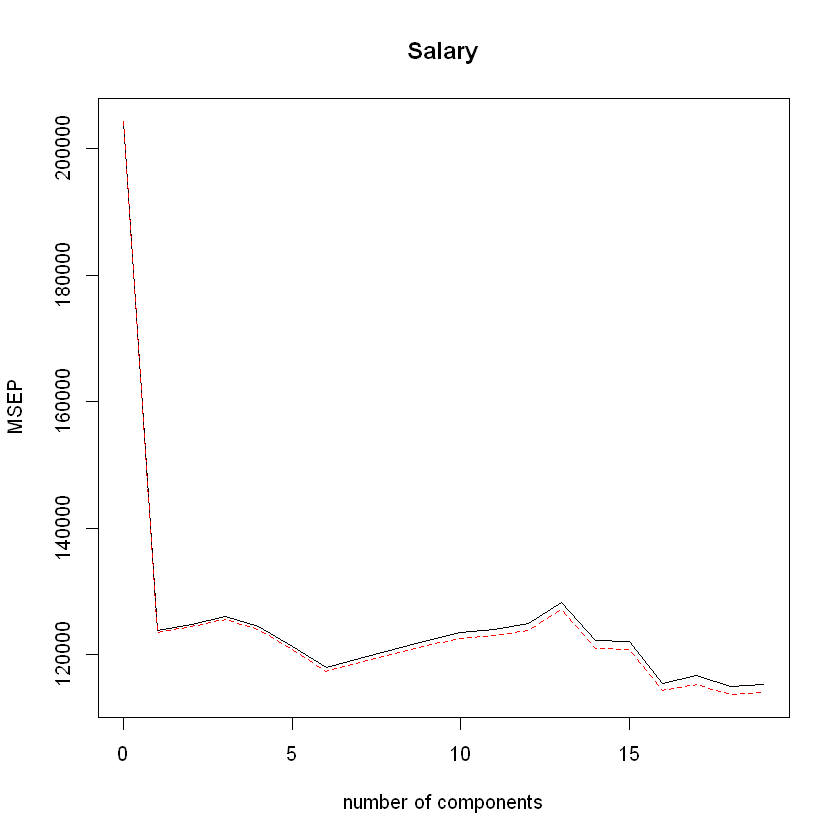

In [66]:
validationplot(pcr_fit, val.type = "MSEP")

We see that the smallest cross-validation error occurs when M = 18 components
are used. This is barely fewer than M = 19, which amounts to
simply performing least squares, because when all of the components are
used in PCR no dimension reduction occurs. However, from the plot we
also see that the cross-validation error is roughly the same when only one
component is included in the model. This suggests that a model that uses
just a small number of components might suffice.

The summary() function also provides the percentage of variance explained
in the predictors and in the response using different numbers of components. Briefly,
we can think of this as the amount of information about the predictors or
the response that is captured using M principal components. For example,
setting M = 1 only captures 38.31% of all the variance, or information, in
the predictors. In contrast, using M = 5 increases the value to 84.29 %. If
we were to use all M = p = 19 components, this would increase to 100 %.

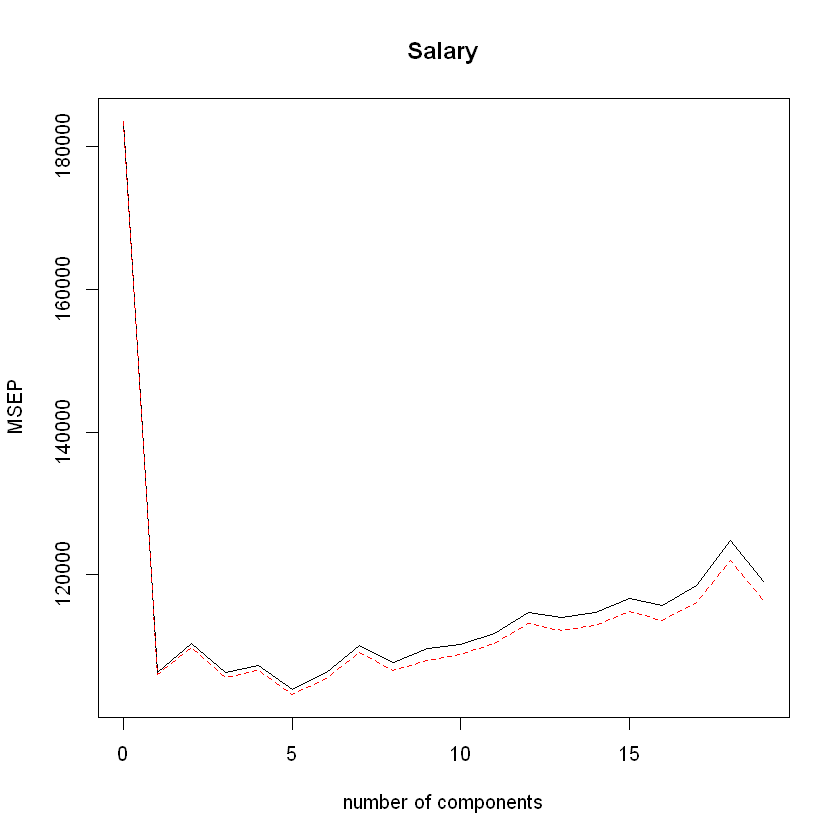

In [67]:
set.seed(1)

pcr_fit <- pcr(Salary ~ ., data = Hitters, subset = train, scale = TRUE, validation = "CV")

validationplot(pcr_fit, val.type = "MSEP")

> Now we find that the lowest cross-validation error occurs when M = 5
components are used. We compute the test MSE as follows.

In [69]:
pcr_pred <- predict(pcr_fit, x[test,], ncomp = 5)

mean((pcr_pred - y_test)^2)

[1] 142811.8

This test set MSE is competitive with the results obtained using ridge regression
and the lasso. However, as a result of the way PCR is implemented,
the final model is more difficult to interpret because it does not perform
any kind of variable selection or even directly produce coefficient estimates.

In [71]:
# Finally, we fit PCR on the full data set, using M = 5, the number of components identified by cross-validation

pcr_fit <- pcr(y ~ x, scale = TRUE, ncomp = 5)

summary(pcr_fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps
X    38.31    60.16    70.84    79.03    84.29
y    40.63    41.58    42.17    43.22    44.90


# Partial Least Squares

In [73]:
set.seed(1)

pls_fit <- plsr(Salary ~ ., data = Hitters, scale = TRUE, subset = train, validation = "CV")


summary(pls_fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    325.5    329.9    328.8    339.0    338.9    340.1
adjCV        428.3    325.0    328.2    327.2    336.6    336.1    336.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       339.0    347.1    346.4     343.4     341.5     345.4     356.4
adjCV    336.2    343.4    342.8     340.2     338.3     341.8     351.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        348.4     349.1     350.0     344.2     344.5     345.0
adjCV     344.2     345.0     345.9     340.4     340.6     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.13    48.80    60.09    75.07    78.58    81.12    88.21    90.71
Salary 

The lowest cross-validation error occurs when only M = 1 partial least
squares directions are used. We now evaluate the corresponding test set
MSE.

In [75]:
pls_pred <- predict(pls_fit, x[test,], ncomp = 1)

mean((pls_pred - y_test)^2)

[1] 151995.3

The test MSE is comparable to, but slightly higher than, the test MSE
obtained using ridge regression, the lasso, and PCR.

In [76]:
#Finally, we perform PLS using the full data set, using M = 1, the number of components identified by cross-validation.


pls_fit <- plsr(Salary ~ ., data = Hitters, scale = TRUE, ncomp = 1)

summary(pls_fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 1
TRAINING: % variance explained
        1 comps
X         38.08
Salary    43.05


Notice that the percentage of variance in Salary that the one-component
PLS fit explains, 43.05 %, is almost as much as that explained using the final
five-component model PCR fit, 44.90 %. This is because PCR only attempts
to maximize the amount of variance explained in the predictors, while PLS
searches for directions that explain variance in both the predictors and the
response.